<a href="https://colab.research.google.com/github/LokeshJatangi/EVA-vision/blob/master/Project%209/Assignment_9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model without cutout



## Importing modules and libraries


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import cv2
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler


## Loading Cifar 10 dataset

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

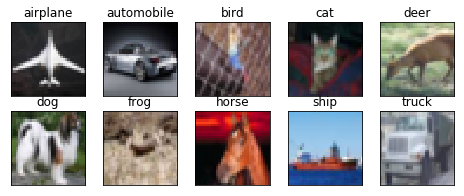

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Model Architecture

In [7]:
# Define the model
model = Sequential()

# Convolution Block 1 
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Output = (32x32x48) , RF= 2x2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(48, 3, 3))#Output = (30x30x48) , RF= 4x4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))                      # Convolution Block 1 ends

# Max Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (15x15x48) ,RF = 8x8

# Transistion layer
model.add(Convolution2D(24,1,1))# Output = (15x15x24) ,RF = 8x8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Convolution Block 2 
model.add(Convolution2D(48,3,3))# Output = (13x13x48) ,RF = 10x10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (13x13x96) ,RF = 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3))# Output = (11x11x192) ,RF = 14x14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))                   # Convolution Block 2 ends


# MaxPoolin layer
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (5x5x192) ,RF = 28x28

# Transition Layer 
model.add(Convolution2D(48,1,1))# Output = (5x5x48) ,RF = 28x28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Convolution block 3 
model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (5x5x96) ,RF = 30x30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(192, 3, 3, border_mode='same'))# Output = (5x5x192) ,RF = 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(384, 3, 3,border_mode='same'))# Output = (5x5x384) ,RF = 34x34
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))                      

model.add(Convolution2D(560, 3, 3))# Output = (3x3x384) ,RF = 36x36
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Convolution2D(1024, 3, 3))# Output = (3x3x384) ,RF = 38x38
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

# Convolution Block 3 ends

# Bigger kernel 
model.add(Convolution2D(10, 1,1))
model.add(Flatten())

model.add (Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0812 17:46:05.663835 140626307696512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0812 17:46:05.683103 140626307696512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 17:46:05.686275 140626307696512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 17:46:05.721821 140626307696512 deprecation_wrapper

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=40)`
  if sys.path[0] == '':
W0812 17:46:10.355204 140626307696512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/40
195/195 [==============================] - 52s 269ms/step - loss: 1.9171 - acc: 0.3626 - val_loss: 1.9162 - val_acc: 0.3747
Epoch 2/40
195/195 [==============================] - 46s 235ms/step - loss: 1.4317 - acc: 0.4936 - val_loss: 1.8383 - val_acc: 0.4587
Epoch 3/40
195/195 [==============================] - 44s 227ms/step - loss: 1.2228 - acc: 0.5725 - val_loss: 1.4062 - val_acc: 0.5568
Epoch 4/40
195/195 [==============================] - 44s 228ms/step - loss: 1.0777 - acc: 0.6215 - val_loss: 1.1525 - val_acc: 0.6363
Epoch 5/40
195/195 [==============================] - 44s 228ms/step - loss: 0.9282 - acc: 0.6744 - val_loss: 1.2312 - val_acc: 0.6132
Epoch 6/40
195/195 [==============================] - 44s 228ms/step - loss: 0.8320 - acc: 0.7059 - val_loss: 0.9844 - val_acc: 0.7010
Epoch 7/40
195/195 [==============================] - 44s 227ms/step - loss: 0.7607 - acc: 0.7314 - val_loss: 0.8846 - val_acc: 0.6936
Epoch 8/40
195/195 [==============================] - 4

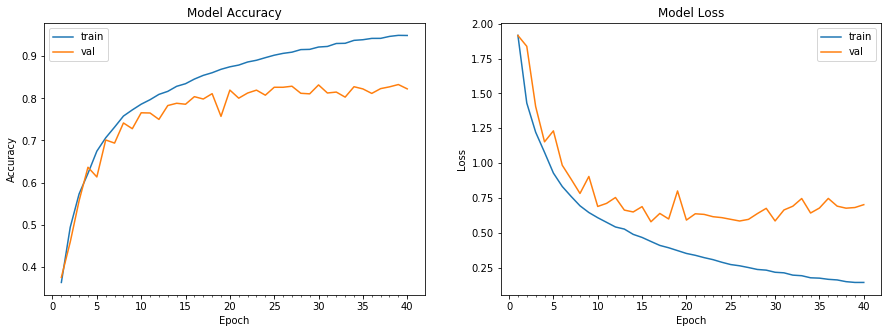

Accuracy on test data is: 82.24


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 40, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#GradCam function

In [0]:
def grad_cam(i,layer):
  img=test_features[i]
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(560):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img=np.uint8(255*img)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img= cv2.addWeighted(img, 0.65, heatmap, 0.35, 0)

  predicted_label = class_names[class_idx]

  return img,superimposed_img,predicted_label


##GradCam on few images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


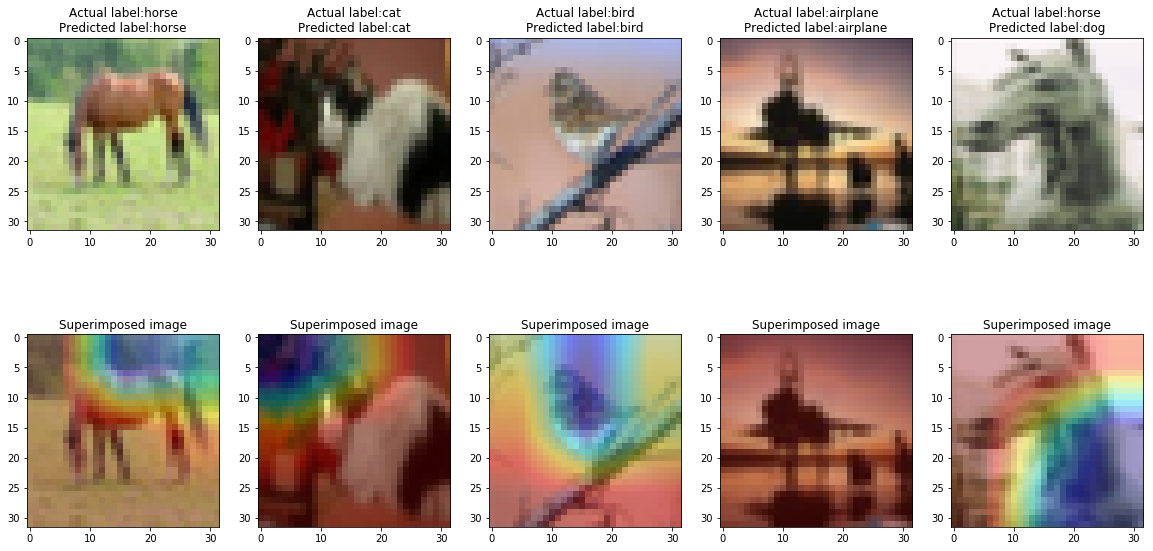

In [11]:
img_indexes=[60,78,129,192,145]
col=len(img_indexes)
fig = plt.figure(figsize=(col*4,col*2))
layer='conv2d_11'
for i in range(1,col+1):
    actual = class_names[np.argmax(test_labels[img_indexes[i-1]])]
    image,spr_img,predicted_label = grad_cam(img_indexes[i-1],layer)
    ax=fig.add_subplot(2,col,i)
    ax.imshow(image)
    ax.set_title("Actual label:"+actual+"\n"+"Predicted label:"+predicted_label)
    ax=plt.subplot(2,col,i+col)
    ax.imshow(spr_img)
    ax.set_title("Superimposed image")
    
fig.subplots_adjust()

#Part - 2 of Assignment

#Adding Cutout 

In [8]:
# Define the model
model = Sequential()

# Convolution Block 1 
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #Output = (32x32x48) , RF= 2x2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(48, 3, 3))#Output = (30x30x48) , RF= 4x4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))                      # Convolution Block 1 ends

# Max Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (15x15x48) ,RF = 8x8

# Transistion layer
model.add(Convolution2D(24,1,1))# Output = (15x15x24) ,RF = 8x8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Convolution Block 2 
model.add(Convolution2D(48,3,3))# Output = (13x13x48) ,RF = 10x10
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (13x13x96) ,RF = 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(192, 3, 3))# Output = (11x11x192) ,RF = 14x14
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))                   # Convolution Block 2 ends


# MaxPoolin layer
model.add(MaxPooling2D(pool_size=(2, 2)))# Output = (5x5x192) ,RF = 28x28

# Transition Layer 
model.add(Convolution2D(48,1,1))# Output = (5x5x48) ,RF = 28x28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Convolution block 3 
model.add(Convolution2D(96, 3, 3, border_mode='same'))# Output = (5x5x96) ,RF = 30x30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(192, 3, 3, border_mode='same'))# Output = (5x5x192) ,RF = 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(384, 3, 3,border_mode='same'))# Output = (5x5x384) ,RF = 34x34
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))                      

model.add(Convolution2D(560, 3, 3))# Output = (3x3x384) ,RF = 36x36
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Convolution2D(1024, 3, 3))# Output = (1x1x384) ,RF = 38x38
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

# Convolution Block 3 ends

# Bigger kernel 
model.add(Convolution2D(10, 1,1))
model.add(Flatten())

model.add (Activation('softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

W0812 18:18:53.838756 140484601280384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0812 18:18:53.856840 140484601280384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 18:18:53.860013 140484601280384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 18:18:53.894583 140484601280384 deprecation_wrapper

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
__________

Epoch 1/10
196/196 [==============================] - 42s 213ms/step - loss: 0.9348 - acc: 0.6656 - val_loss: 1.0059 - val_acc: 0.6665
Epoch 2/10
196/196 [==============================] - 41s 210ms/step - loss: 0.9390 - acc: 0.6661 - val_loss: 1.0942 - val_acc: 0.6435
Epoch 3/10
196/196 [==============================] - 41s 210ms/step - loss: 0.9326 - acc: 0.6681 - val_loss: 0.9649 - val_acc: 0.6778
Epoch 4/10
196/196 [==============================] - 41s 210ms/step - loss: 0.9229 - acc: 0.6691 - val_loss: 0.9489 - val_acc: 0.6833
Epoch 5/10
196/196 [==============================] - 41s 210ms/step - loss: 0.9213 - acc: 0.6695 - val_loss: 0.9138 - val_acc: 0.6946
Epoch 6/10
196/196 [==============================] - 41s 210ms/step - loss: 0.9144 - acc: 0.6723 - val_loss: 0.9136 - val_acc: 0.6914
Epoch 7/10
196/196 [==============================] - 41s 211ms/step - loss: 0.9127 - acc: 0.6722 - val_loss: 0.9317 - val_acc: 0.6892
Epoch 8/10
196/196 [==============================] - 4

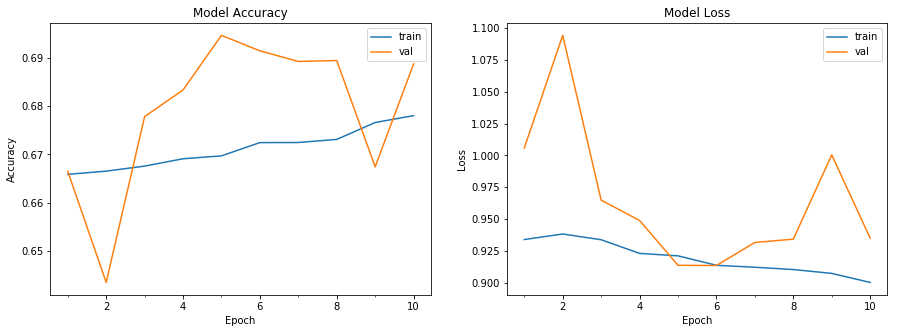

Accuracy on test data is: 23.25


In [28]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(zoom_range=0.0,
                             horizontal_flip=False,featurewise_center=True,featurewise_std_normalization=True,
                            preprocessing_function=get_cutout_eraser())

datagen_validation = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,)
datagen.fit(train_features)
datagen_validation.fit(train_features)

train_iterator = datagen.flow(train_features, train_labels, batch_size=256,shuffle=True)
validation_iterator = datagen_validation.flow(test_features, test_labels, batch_size=512,shuffle=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                               min_lr=0.005)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_iterator,
                    steps_per_epoch=len(train_iterator), 
                    validation_data = validation_iterator, 
                    validation_steps = len(validation_iterator),
                    epochs=10, verbose=1,callbacks=[reduce_lr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###Cutout function

In [0]:
def get_cutout_eraser(p=0.6, s_l=0.05, s_h=0.5, r_1=0.3, r_2=1 / 0.3, max_erasures_per_image=3, pixel_level=True):
    """
    :param p:
    :param s_l: Minimum Area Proportion of Original that may be cut
    :param s_h: Maximum Area Proportion of Original that may be cut
    :param r_1: Min Aspect Ratio
    :param r_2: Max Aspect Ratio
    :param max_erasures_per_image:
    :param pixel_level:
    :return: Eraser to be used as Preprocessing Function
    """
    assert max_erasures_per_image >= 1

    def eraser(input_img):
        v_l = np.min(input_img)
        v_h = np.max(input_img)
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        mx = np.random.randint(1, max_erasures_per_image + 1)
        # print("Erasures = ",mx,end =", ")
        for i in range(mx):
            while True:
                s = np.random.uniform(s_l, s_h) * img_h * img_w
                r = np.random.uniform(r_1, r_2)
                w = int(np.sqrt(s / r))
                h = int(np.sqrt(s * r))
                left = np.random.randint(0, img_w)
                top = np.random.randint(0, img_h)

                if left + w <= img_w and top + h <= img_h:
                    break

            # print("W = ",w,"H = ",h,end =", ")

            if pixel_level:
                # print(np.max(img_c),np.min(img_c),v_l,v_h)
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
                # print(c.shape,np.min(c),np.max(c),np.median(c))
            else:
                c = np.random.uniform(v_l, v_h)

            input_img[top:top + h, left:left + w, :] = c

        # print()
        return input_img

    return eraser

###Plotting images against superimposed images after adding cutout

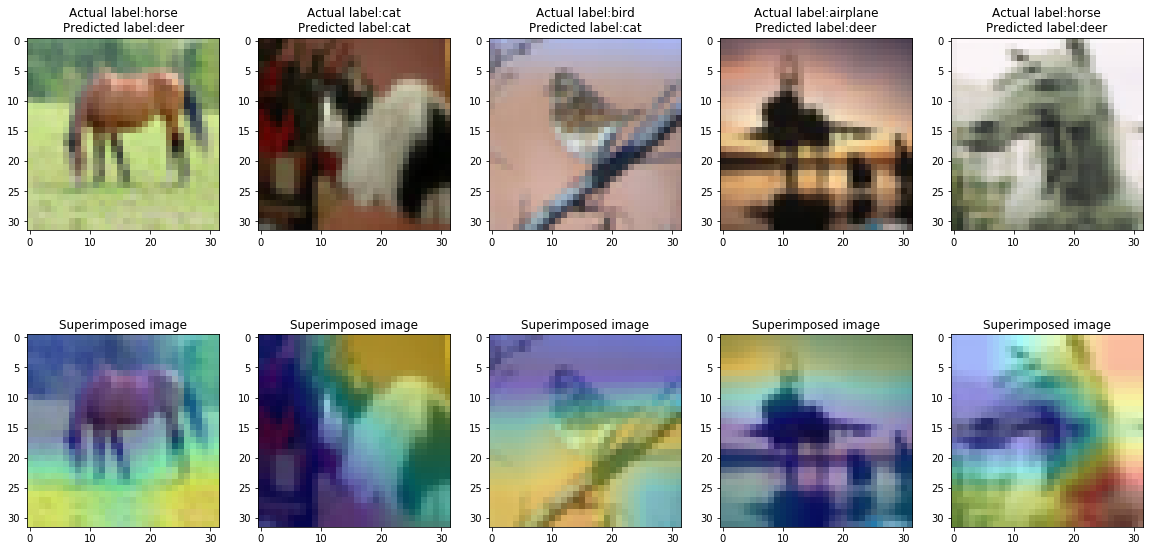

In [23]:
img_indexes=[60,78,129,192,145]
col=len(img_indexes)
fig = plt.figure(figsize=(col*4,col*2))
layer='conv2d_11'
for i in range(1,col+1):
    actual = class_names[np.argmax(test_labels[img_indexes[i-1]])]
    image,spr_img,predicted_label = grad_cam(img_indexes[i-1],layer)
    ax=fig.add_subplot(2,col,i)
    ax.imshow(image)
    ax.set_title("Actual label:"+actual+"\n"+"Predicted label:"+predicted_label)
    ax=plt.subplot(2,col,i+col)
    ax.imshow(spr_img)
    ax.set_title("Superimposed image")
fig.subplots_adjust()